# Module 1 Exercises 

The exercises in this notebook will ask you to plot simple graphs showing the linear relationships between different set of variables. The dataset used in the notebook is about Nutrition data of different food items. There are some of the variables in the dataset which have linear relationships between them.

Read the data from USDA dataset in `"/dsa/data/all_datasets/USDA.csv"` into the dataframe called _USDA_ .

In [1]:
library(dplyr)
library(tidyr)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [2]:
USDA = read.csv("/dsa/data/all_datasets/USDA.csv",header=TRUE,sep=",")
head(USDA)

ID,Description,Calories,Protein,TotalFat,Carbohydrate,Sodium,SaturatedFat,Cholesterol,Sugar,Calcium,Iron,Potassium,VitaminC,VitaminE,VitaminD
<int>,<fct>,<int>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
1001,"BUTTER,WITH SALT",717,0.85,81.11,0.06,714,51.368,215,0.06,24,0.02,24,0,2.32,1.5
1002,"BUTTER,WHIPPED,WITH SALT",717,0.85,81.11,0.06,827,50.489,219,0.06,24,0.16,26,0,2.32,1.5
1003,"BUTTER OIL,ANHYDROUS",876,0.28,99.48,0.00,2,61.924,256,0.00,4,0.00,5,0,2.80,1.8
1004,"CHEESE,BLUE",353,21.40,28.74,2.34,1395,18.669,75,0.50,528,0.31,256,0,0.25,0.5
1005,"CHEESE,BRICK",371,23.24,29.68,2.79,560,18.764,94,0.51,674,0.43,136,0,0.26,0.5
1006,"CHEESE,BRIE",334,20.75,27.68,0.45,629,17.410,100,0.45,184,0.50,152,0,0.24,0.5


In [3]:
str(USDA)

'data.frame':	7058 obs. of  16 variables:
 $ ID          : int  1001 1002 1003 1004 1005 1006 1007 1008 1009 1010 ...
 $ Description : Factor w/ 7054 levels "ABALONE,MIXED SPECIES,RAW",..: 1303 1302 1298 2303 2304 2305 2306 2307 2308 2309 ...
 $ Calories    : int  717 717 876 353 371 334 300 376 403 387 ...
 $ Protein     : num  0.85 0.85 0.28 21.4 23.24 ...
 $ TotalFat    : num  81.1 81.1 99.5 28.7 29.7 ...
 $ Carbohydrate: num  0.06 0.06 0 2.34 2.79 0.45 0.46 3.06 1.28 4.78 ...
 $ Sodium      : int  714 827 2 1395 560 629 842 690 621 700 ...
 $ SaturatedFat: num  51.4 50.5 61.9 18.7 18.8 ...
 $ Cholesterol : int  215 219 256 75 94 100 72 93 105 103 ...
 $ Sugar       : num  0.06 0.06 0 0.5 0.51 0.45 0.46 NA 0.52 NA ...
 $ Calcium     : int  24 24 4 528 674 184 388 673 721 643 ...
 $ Iron        : num  0.02 0.16 0 0.31 0.43 0.5 0.33 0.64 0.68 0.21 ...
 $ Potassium   : int  24 26 5 256 136 152 187 93 98 95 ...
 $ VitaminC    : num  0 0 0 0 0 0 0 0 0 0 ...
 $ VitaminE    : num  2.32 2.3

In [4]:
cor(USDA[,3:16])

,Calories,Protein,TotalFat,Carbohydrate,Sodium,SaturatedFat,Cholesterol,Sugar,Calcium,Iron,Potassium,VitaminC,VitaminE,VitaminD
Calories,1,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Protein,NA,1,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
TotalFat,NA,NA,1,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Carbohydrate,NA,NA,NA,1,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Sodium,NA,NA,NA,NA,1,NA,NA,NA,NA,NA,NA,NA,NA,NA
SaturatedFat,NA,NA,NA,NA,NA,1,NA,NA,NA,NA,NA,NA,NA,NA
Cholesterol,NA,NA,NA,NA,NA,NA,1,NA,NA,NA,NA,NA,NA,NA
Sugar,NA,NA,NA,NA,NA,NA,NA,1,NA,NA,NA,NA,NA,NA
Calcium,NA,NA,NA,NA,NA,NA,NA,NA,1,NA,NA,NA,NA,NA
Iron,NA,NA,NA,NA,NA,NA,NA,NA,NA,1,NA,NA,NA,NA


Above outcome is the result of NA values in the dataset. Identify the NA values and fill the missing data so that we can identify the correlations. 

**Activity 1:** Find the number of **rows** with any NA values.

In [5]:
## Your answer for activity 1 goes here ---

sum(apply(USDA, 1, anyNA))

[1] 3684

In [6]:
dim(USDA)

[1] 7058   16

In [7]:
#double checking the amount of rows with NA values
na_df <- USDA[rowSums(is.na(USDA)) > 0,]
dim(na_df)

[1] 3684   16

**Activity 2:** Fill the missing NA values in the dataset.

In [8]:
## Your answer for activity 2 goes here ---
#fill NA with column mean
USDA_filled <- USDA %>% mutate_all(~ifelse(is.na(.x), mean(.x, na.rm = TRUE), .x))

#find rows with any NA values
sum(apply(USDA_filled, 1, anyNA))

[1] 0

**Activity 3:** Find the correlation between the variables in the dataset and find the pairs which have correlation more than 0.5. 

*Hint: there are 4 pairs of them.*

**Programmatically list them** or **create a visualization** that one can read the answer off of it easily, as opposed to just printing a correlation matrix.

In [9]:
library(tibble)

In [10]:
## Your answer for activity 3 goes here ---
#gathering() a correlation matrix

USDA_filled%>% 
  as.matrix %>%
  cor %>%
  as.data.frame %>%
  rownames_to_column(var = 'var1') %>%
  gather(var2, value, -var1) %>% filter(value > 0.5 & value < 1) %>% filter(var2 > var1)

var1,var2,value
<chr>,<chr>,<dbl>
Calories,TotalFat,0.8077699
SaturatedFat,TotalFat,0.7517715
Calories,SaturatedFat,0.5970342
Carbohydrate,Sugar,0.6084425


In [11]:
#visualization method
corr <- round(cor(USDA_filled), digits=2)

In [12]:
library(ggplot2)
library(gridExtra)


Attaching package: ‘gridExtra’

The following object is masked from ‘package:dplyr’:

    combine



**Activity 4:** Fit a linear regression model between Calories and TotalFat.

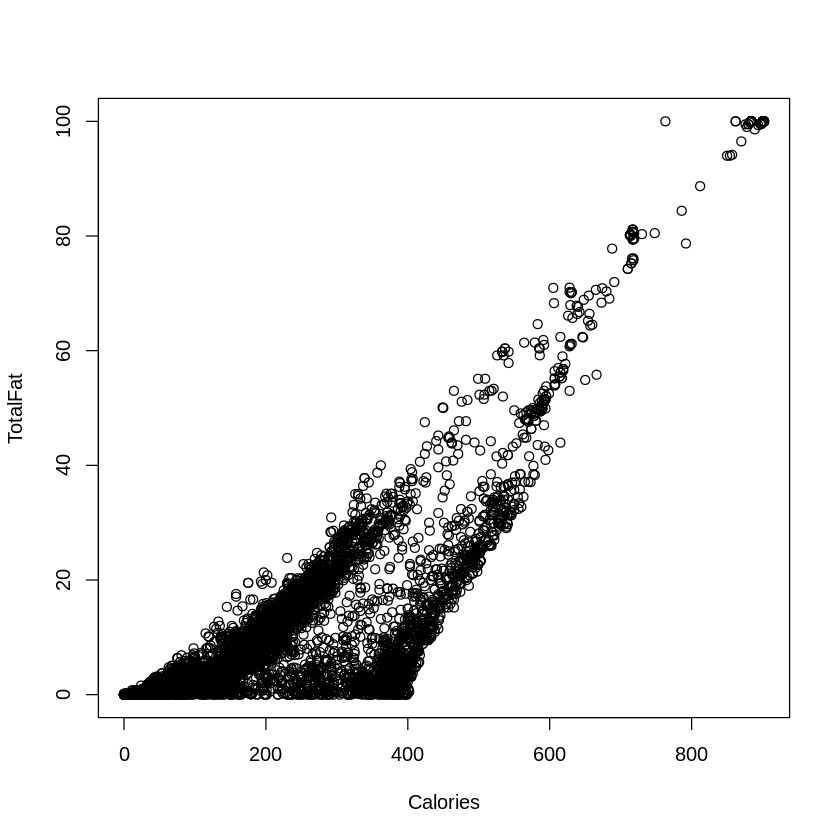

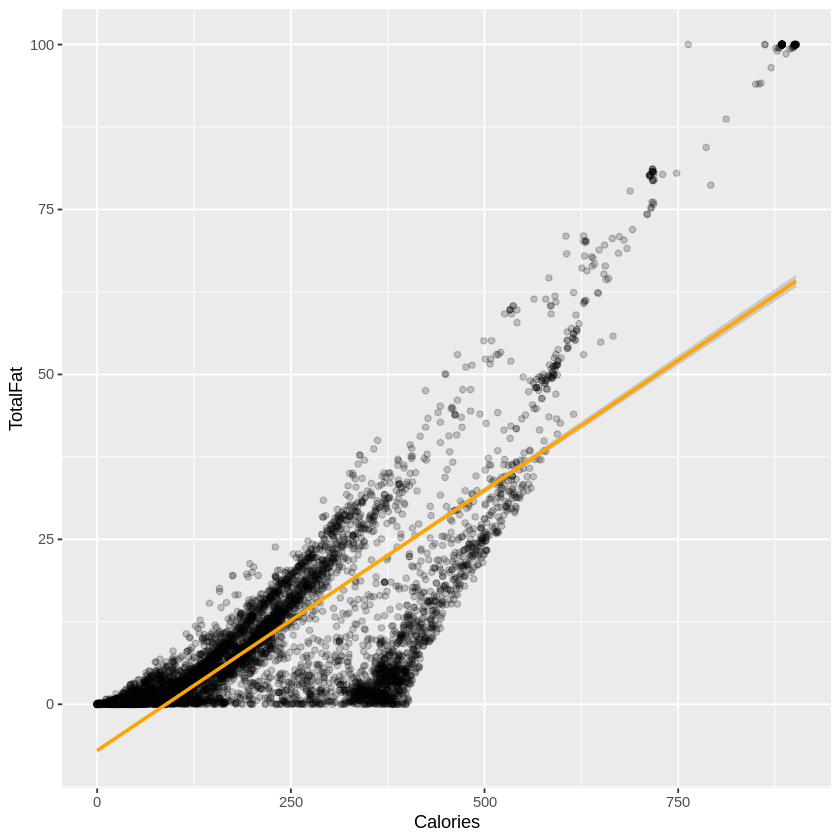

In [13]:
## Your answer for activity 4 goes here ---

plot(TotalFat ~ Calories, data = USDA_filled)

tfat_Cal.graph <- ggplot(data=USDA_filled, aes(x=Calories, y=TotalFat)) + geom_point(alpha=0.2)
tfat_Cal.graph + geom_smooth(method=lm, color='orange')

**Activity 5:** Plot a grid of **scatter plots** for the 4 pairs of correlations identified in activity 3.
Make sure to add a **regression line**.

var1,var2,value
<chr>,<chr>,<dbl>
Calories,TotalFat,0.8077699
SaturatedFat,TotalFat,0.7517715
Calories,SaturatedFat,0.5970342
Carbohydrate,Sugar,0.6084425


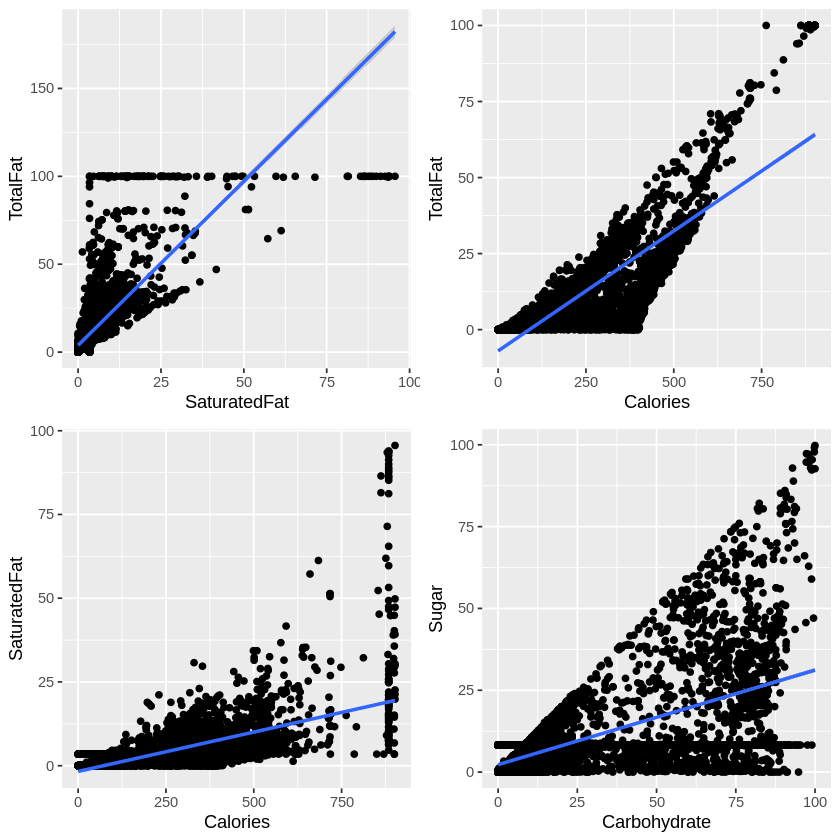

In [14]:
## Your answer for activity 5 goes here ---
highcorr <- USDA_filled %>% 
  as.matrix %>%
  cor %>%
  as.data.frame %>%
  rownames_to_column(var = 'var1') %>%
  gather(var2, value, -var1) %>% 
  filter(value > 0.5 & value < 1) %>% filter(var2 > var1)

highcorr

#<- ggplot()

tfat_satfat <- ggplot(USDA_filled, aes(x=SaturatedFat, y=TotalFat)) + geom_point()
tfat_satfat <- tfat_satfat + geom_smooth(method=lm) + expand_limits(x= 75,y = 75) #why is limits not working?
tfat_calories <- ggplot(USDA_filled, aes(x=Calories, y=TotalFat)) + geom_point() + geom_smooth(method=lm)
sfat_calories <- ggplot(USDA_filled, aes(x=Calories, y=SaturatedFat)) + geom_point() + geom_smooth(method=lm)
sugar_carb <- ggplot(USDA_filled, aes(x=Carbohydrate, y=Sugar)) + geom_point() + geom_smooth(method=lm)

grid.arrange(tfat_satfat,tfat_calories,sfat_calories,sugar_carb)

**Activity 6:** Plot a scatter plot between Calories and TotalFat. Plot the points in green color and transparent. Adjust the breaks for x and y axes. 

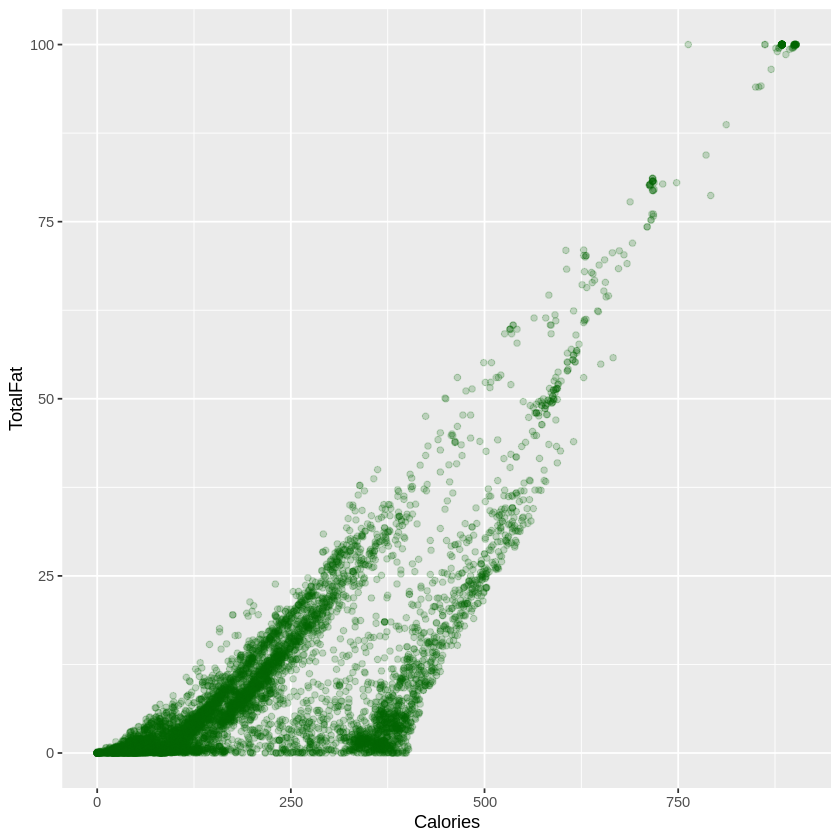

In [15]:
## Your answer for activity 6 goes here ---

ggplot(USDA_filled, aes(x=Calories, y=TotalFat)) + geom_point(color='darkgreen', alpha=0.2)